In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [3]:
df = pd.read_csv('Train.csv')
print(df)

          ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
0          1               D           Flight                    4   
1          2               F           Flight                    4   
2          3               A           Flight                    2   
3          4               B           Flight                    3   
4          5               C           Flight                    2   
...      ...             ...              ...                  ...   
10994  10995               A             Ship                    4   
10995  10996               B             Ship                    4   
10996  10997               C             Ship                    5   
10997  10998               F             Ship                    5   
10998  10999               D             Ship                    2   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
0                    2                  177                3   
1                    5         

In [4]:

print("Average Cost per Warehouse")
print(df.groupby('Warehouse_block')['Cost_of_the_Product'].mean())

Average Cost per Warehouse
Warehouse_block
A    208.767594
B    212.159302
C    211.191489
D    210.907852
F    209.077196
Name: Cost_of_the_Product, dtype: float64


In [5]:

print("\nOn-Time Delivery by Shipment Mode")
print(df.groupby('Mode_of_Shipment')['Reached.on.Time_Y.N'].sum())


On-Time Delivery by Shipment Mode
Mode_of_Shipment
Flight    1069
Road      1035
Ship      4459
Name: Reached.on.Time_Y.N, dtype: int64


In [6]:

print(df.groupby('Mode_of_Shipment')['Reached.on.Time_Y.N'].mean())

Mode_of_Shipment
Flight    0.601576
Road      0.588068
Ship      0.597561
Name: Reached.on.Time_Y.N, dtype: float64


In [7]:

print(df.groupby('Mode_of_Shipment')['Reached.on.Time_Y.N'].sum())

Mode_of_Shipment
Flight    1069
Road      1035
Ship      4459
Name: Reached.on.Time_Y.N, dtype: int64


In [8]:

print(df.groupby('Mode_of_Shipment')['Weight_in_gms'].sum())

Mode_of_Shipment
Flight     6449405
Road       6423209
Ship      27097936
Name: Weight_in_gms, dtype: int64


In [9]:

print("Average Weight per Warehouse")
print(df.groupby('Warehouse_block')['Weight_in_gms'].mean())

Average Weight per Warehouse
Warehouse_block
A    3615.448991
B    3635.701037
C    3641.331151
D    3628.846783
F    3641.387616
Name: Weight_in_gms, dtype: float64


In [10]:
print(df.groupby('Warehouse_block')['Mode_of_Shipment'].value_counts())


Warehouse_block  Mode_of_Shipment
A                Ship                1242
                 Flight               297
                 Road                 294
B                Ship                1243
                 Flight               296
                 Road                 294
C                Ship                1244
                 Flight               295
                 Road                 294
D                Ship                1245
                 Flight               297
                 Road                 292
F                Ship                2488
                 Flight               592
                 Road                 586
Name: count, dtype: int64


In [11]:
df.groupby('Warehouse_block')['Mode_of_Shipment'].count()


Warehouse_block
A    1833
B    1833
C    1833
D    1834
F    3666
Name: Mode_of_Shipment, dtype: int64

In [12]:
df.groupby('Reached.on.Time_Y.N')['Customer_rating'].mean()

Reached.on.Time_Y.N
0    2.967989
1    3.005790
Name: Customer_rating, dtype: float64

In [13]:
df.groupby('Customer_rating')['Reached.on.Time_Y.N'].value_counts()

Customer_rating  Reached.on.Time_Y.N
1                1                      1313
                 0                       922
2                1                      1273
                 0                       892
3                1                      1357
                 0                       882
4                1                      1303
                 0                       886
5                1                      1317
                 0                       854
Name: count, dtype: int64

In [14]:
df.groupby('Product_importance')['Reached.on.Time_Y.N'].value_counts()

Product_importance  Reached.on.Time_Y.N
high                1                       616
                    0                       332
low                 1                      3140
                    0                      2157
medium              1                      2807
                    0                      1947
Name: count, dtype: int64

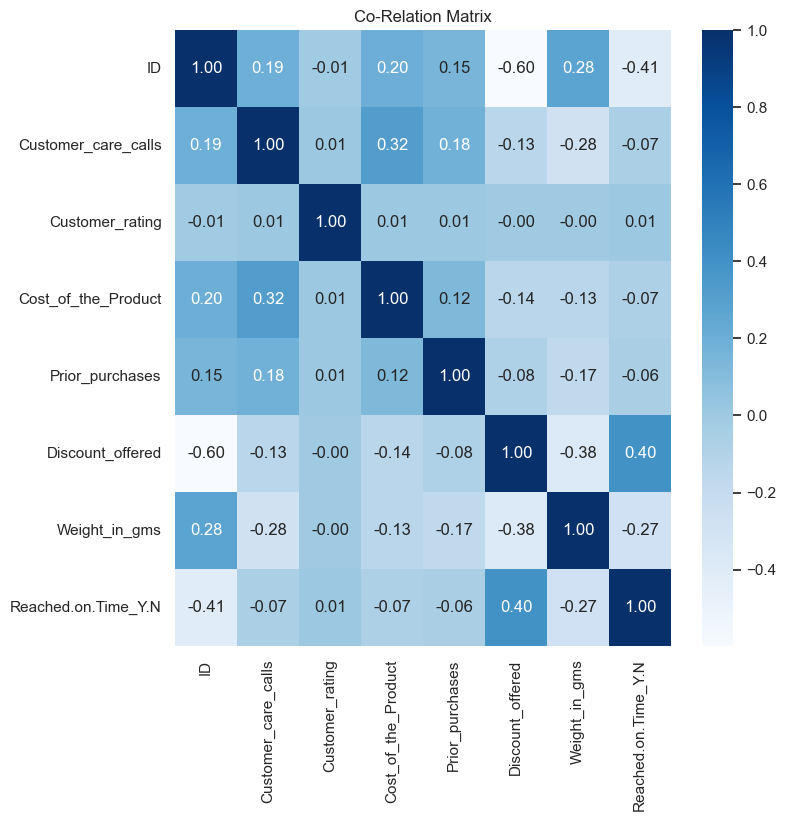

In [15]:
plt.figure(figsize=(8,8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(),annot = True, cmap = 'Blues',fmt = '.2f')
plt.title("Co-Relation Matrix")
plt.show()

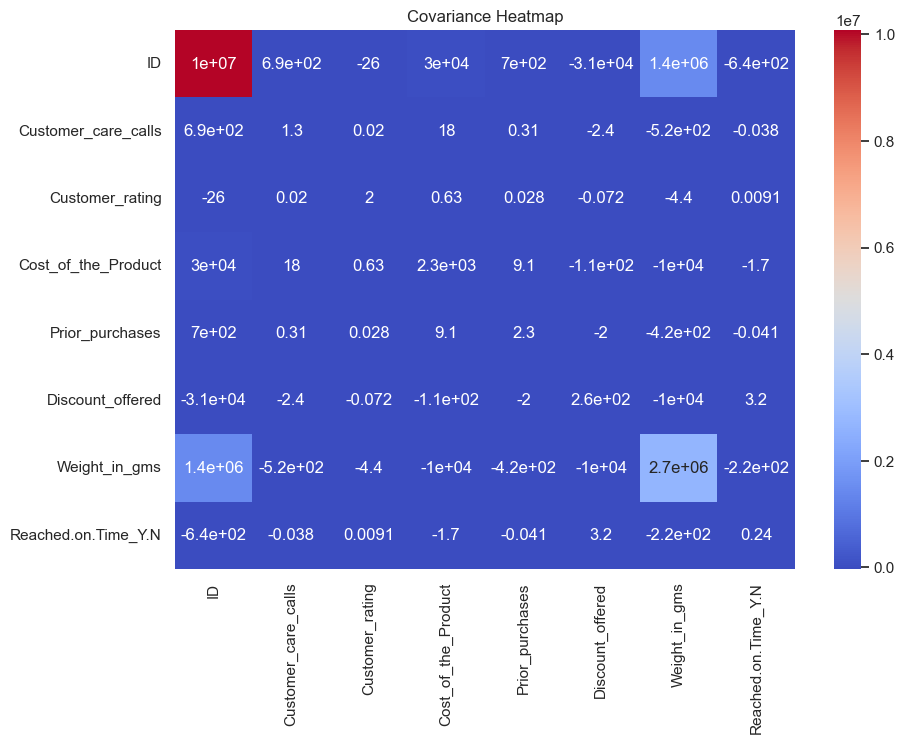

In [16]:
cov_matrix = numeric_df.cov()
plt.figure(figsize=(10,7))
sns.heatmap(cov_matrix, annot=True, cmap="coolwarm")
plt.title("Covariance Heatmap")
plt.show()


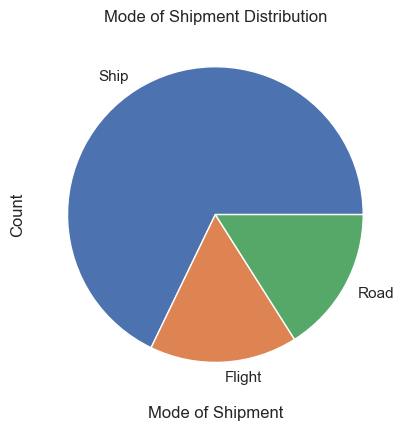

In [17]:
df["Mode_of_Shipment"].value_counts().plot(kind='pie')
plt.title("Mode of Shipment Distribution")
plt.xlabel("Mode of Shipment")
plt.ylabel("Count")
plt.show()


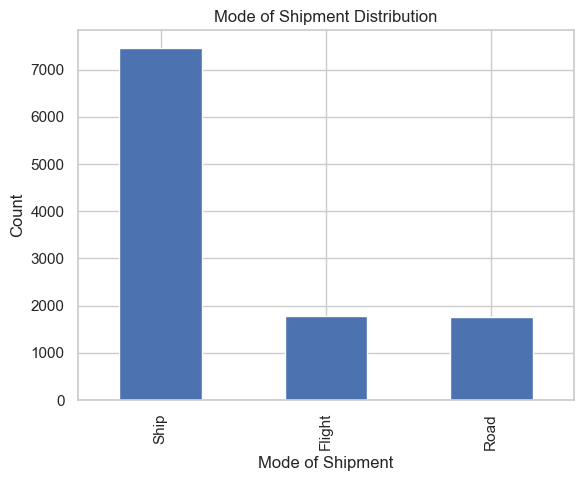

In [18]:
df["Mode_of_Shipment"].value_counts().plot(kind='bar')
plt.title("Mode of Shipment Distribution")
plt.xlabel("Mode of Shipment")
plt.ylabel("Count")
plt.show()


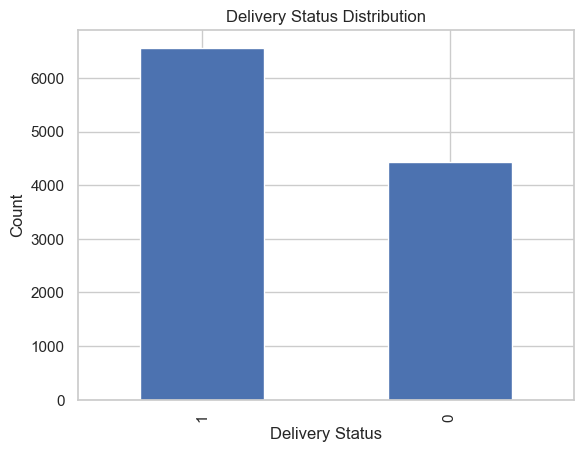

In [19]:
df["Reached.on.Time_Y.N"].value_counts().plot(kind='bar')

plt.title("Delivery Status Distribution")
plt.xlabel("Delivery Status")
plt.ylabel("Count")
plt.show()


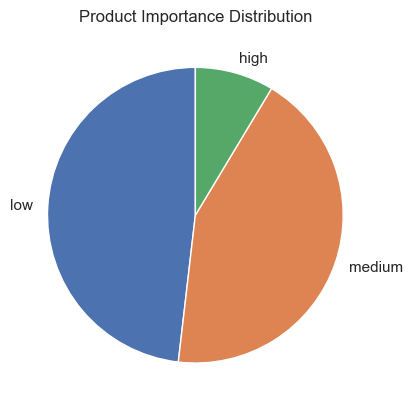

In [20]:
df["Product_importance"].value_counts().plot(kind='pie',
                                             startangle=90)

plt.title("Product Importance Distribution")
plt.ylabel("")
plt.show()


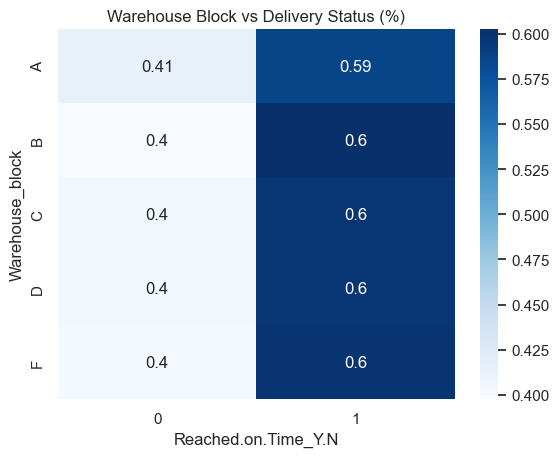

In [21]:
cross_tab_percent = pd.crosstab(df['Warehouse_block'],
                                df['Reached.on.Time_Y.N'],
                                normalize='index')

sns.heatmap(cross_tab_percent, annot=True, cmap="Blues")
plt.title("Warehouse Block vs Delivery Status (%)")
plt.show()


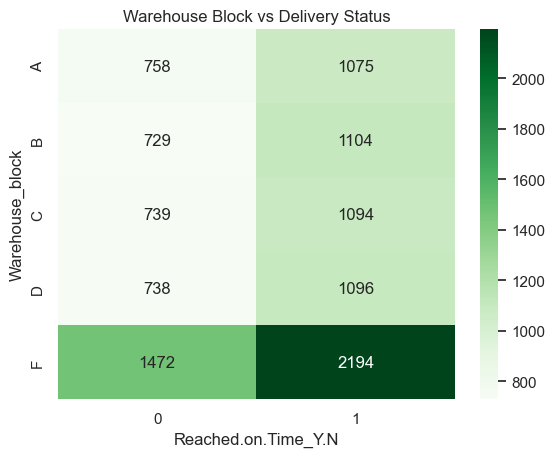

In [22]:
cross_tab = pd.crosstab(df['Warehouse_block'],
                        df['Reached.on.Time_Y.N'])

sns.heatmap(cross_tab, annot=True, cmap="Greens",fmt="d")
plt.title("Warehouse Block vs Delivery Status")
plt.show()


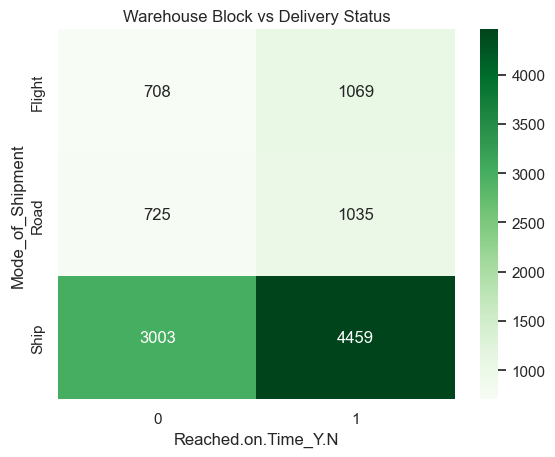

In [23]:
cross_tab = pd.crosstab(df['Mode_of_Shipment'],
                        df['Reached.on.Time_Y.N'])

sns.heatmap(cross_tab, annot=True, cmap="Greens",fmt="d")
plt.title("Warehouse Block vs Delivery Status")
plt.show()


<Axes: xlabel='Warehouse_block', ylabel='Weight_in_gms'>

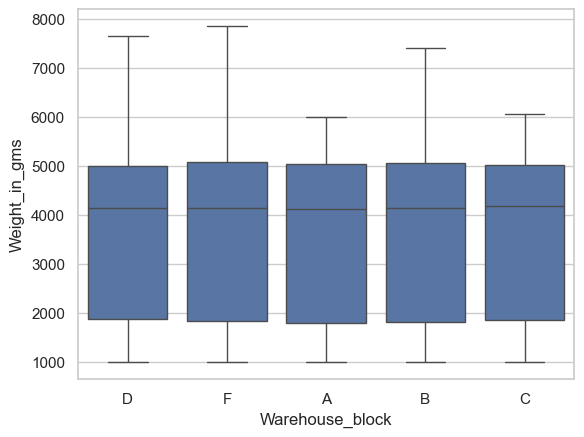

In [24]:
sns.boxplot(x='Warehouse_block',
            y='Weight_in_gms',
            data=df)



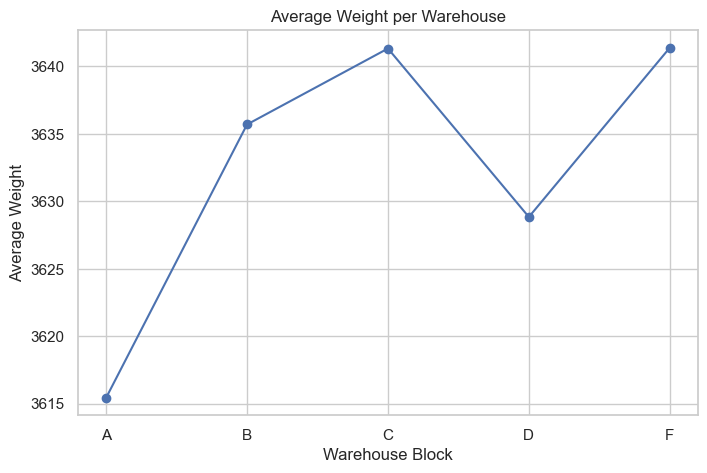

In [25]:
avg_weight = df.groupby('Warehouse_block')['Weight_in_gms'].mean()

plt.figure(figsize=(8,5))
plt.plot(avg_weight.index, avg_weight.values, marker='o')
plt.title("Average Weight per Warehouse")
plt.xlabel("Warehouse Block")
plt.ylabel("Average Weight")
plt.show()


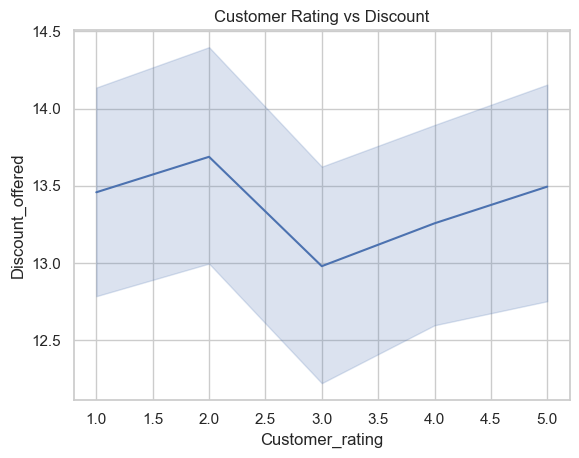

In [26]:
sns.lineplot(x='Customer_rating',
             y='Discount_offered',
             data=df)

plt.title("Customer Rating vs Discount")
plt.show()